In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
f=os.path.join('images','coins7.jpg')
print(f)

images\coins7.jpg


In [17]:
def view_image(i):
    cv2.imshow('view', i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [18]:
i = cv2.imread(f)
view_image(i)

In [19]:
i_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
print(i_gray.shape)
print(i_gray[0,0])
view_image(i_gray)

(480, 640)
157


In [20]:
circles = cv2.HoughCircles(
    i_gray,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=40,
    minRadius=15,
    maxRadius=50
)
image_circles = i.copy()
for x,y,r in circles[0]:
    cv2.circle(
        image_circles,
        (int(x),int(y)),
        int(r),
        (0,0,255),
        thickness=3
    )
view_image(image_circles)

In [21]:
image_blurred=cv2.GaussianBlur(
    i_gray,
    ksize=(11,11),
    sigmaX=0,
)
view_image(image_blurred)

In [22]:
circles = cv2.HoughCircles(
    image_blurred,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=40,
    minRadius=15,
    maxRadius=50
)
image_circles2 =i.copy()
for x,y,r in circles[0]:
    cv2.circle(
        image_circles2,
        (int(x),int(y)),
        int(r),
        (0,0,255),
        thickness=3
    )

The number of coins are:  14


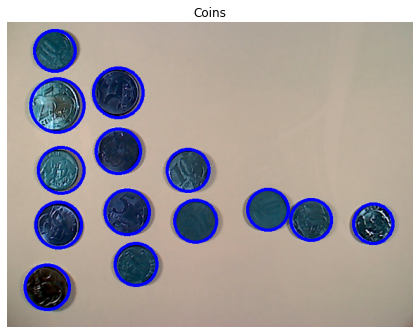

In [24]:
fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Coins')
ax1.imshow(image_circles2)
print("The number of coins are: ", circles.shape[1])